# Hello, Keras

In [1]:
!pip install Keras==2.1.1 tensorflow==1.2.1

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D
)

## CNN with MNIST Data

In [4]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

In [5]:
print('x_train shape:', x_train_original.shape)
print('y_train shape:', y_train_original.shape)
print('x_test shape:', x_test_original.shape)
print('y_test shape:', y_test_original.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


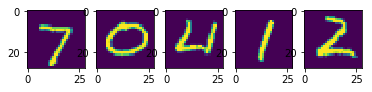

In [6]:
_, axes = plt.subplots(ncols=5)
axes[0].imshow(x_test_original[0])
axes[1].imshow(x_test_original[69])
axes[2].imshow(x_test_original[33])
axes[3].imshow(x_test_original[5])
axes[4].imshow(x_test_original[996]);

Note that Theano uses `channels_first` and TensorFlow uses `channels_last`. Here we will use TensorFlow as the backend. See [Keras backends](https://keras.io/backend/) for more detail. We adjust the input shape accordingly.

In [7]:
img_rows, img_cols = 28, 28
x_train = x_train_original.reshape(x_train_original.shape[0], img_rows, img_cols, 1)
x_test = x_test_original.reshape(x_test_original.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

Normalize data to the range [0, 1].

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices.

In [9]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train_original, num_classes)
y_test = keras.utils.to_categorical(y_test_original, num_classes)

Define the model architecture.

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

In [11]:
#model = Sequential()
#model.add(Dense(784, activation='relu', input_shape=input_shape))

In [12]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [13]:
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(), 
    metrics=['accuracy']
)

In [ ]:
model.fit(
    x_train, 
    y_train,
    batch_size=128,
    epochs=5,
    verbose=1,      
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 146s 2ms/step - loss: 0.3311 - acc: 0.8991 - val_loss: 0.0767 - val_acc: 0.9770
Epoch 2/5
49280/60000 [=======================>......] - ETA: 23s - loss: 0.1158 - acc: 0.9657

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Predict one test data.

In [ ]:
_, axes = plt.subplots(ncols=5)
axes[0].imshow(x_test_original[0])
axes[1].imshow(x_test_original[69])
axes[2].imshow(x_test_original[33])
axes[3].imshow(x_test_original[5])
axes[4].imshow(x_test_original[996]);

In [ ]:
print(
    model.predict_classes(np.array([x_test[0]])), 
    model.predict_classes(np.array([x_test[69]])),
    model.predict_classes(np.array([x_test[33]])),
    model.predict_classes(np.array([x_test[5]])),
    model.predict_classes(np.array([x_test[996]]))
)

# MLP with Random Data

In [ ]:
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

Define the model architecture.

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))

In [ ]:
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(10, activation='softmax'))

In [ ]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
result = model.predict_classes(np.array([x_test[0]]))
print(result)